In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User
target_user = "realdonaldtrump"

# Create array to record all date-times of tweets
tweet_times = []

# Loop through 500 tweets
for x in range(25):
    
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
        
        # Print tweets for preview
        if x % 100 == 0:
            print(tweet["created_at"])

# Confirm tweet counts
len(tweet_times)

Tue Nov 14 17:39:54 +0000 2017
Tue Nov 14 09:11:51 +0000 2017
Tue Nov 14 08:07:29 +0000 2017
Tue Nov 14 06:23:12 +0000 2017
Tue Nov 14 05:26:45 +0000 2017
Tue Nov 14 05:20:31 +0000 2017
Tue Nov 14 05:08:19 +0000 2017
Tue Nov 14 02:21:14 +0000 2017
Mon Nov 13 15:06:01 +0000 2017
Mon Nov 13 14:57:02 +0000 2017
Mon Nov 13 12:33:24 +0000 2017
Mon Nov 13 12:29:06 +0000 2017
Sun Nov 12 14:29:22 +0000 2017
Sun Nov 12 11:20:20 +0000 2017
Sun Nov 12 10:21:06 +0000 2017
Sun Nov 12 00:48:01 +0000 2017
Sun Nov 12 00:43:36 +0000 2017
Sun Nov 12 00:18:32 +0000 2017
Sun Nov 12 00:16:05 +0000 2017
Sat Nov 11 23:35:39 +0000 2017


500

In [3]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(tweet_times[x])
        print(tweet_datetime)

Tue Nov 14 17:39:54 +0000 2017
2017-11-14 17:39:54+00:00
Fri Nov 03 14:29:55 +0000 2017
2017-11-03 14:29:55+00:00
Thu Oct 26 13:45:45 +0000 2017
2017-10-26 13:45:45+00:00
Sun Oct 15 13:46:27 +0000 2017
2017-10-15 13:46:27+00:00
Thu Oct 05 10:31:24 +0000 2017
2017-10-05 10:31:24+00:00


In [4]:
# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print(f"Avg. Hours Between Tweets: {np.mean(time_in_between)}")

Avg. Hours Between Tweets: 2.413955132487197


In [5]:
time_in_between[:10]

[8.4675,
 1.0727777777777778,
 1.7380555555555555,
 0.9408333333333333,
 0.10388888888888889,
 0.20333333333333334,
 2.7847222222222223,
 11.25361111111111,
 0.14972222222222223,
 2.3938888888888887]

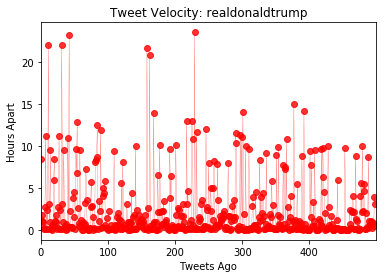

In [6]:
# Plot Time Between Tweets
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Tweet Velocity: %s" % target_user)
plt.show()